In [1]:
import pandas as pd
import datetime as dt

In [2]:
# import data

url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
# add a datetime column with to_datetime pandas function to convert to datetime data type
df['datetime'] = pd.to_datetime(df['date'])

In [6]:
# verify changes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01-05


In [7]:
df.loc[0,'datetime']
df.loc[0,'datetime'].strftime('%B %d %Y')

'January 01 2013'

In [8]:
df.loc['2015':]

,date,meantemp,humidity,wind_speed,meanpressure,datetime
202,2013-07-22,29.500000,80.333333,4.333333,996.833333,2013-07-22
203,2013-07-23,31.857143,70.714286,3.971429,998.000000,2013-07-23
204,2013-07-24,29.714286,84.142857,3.971429,997.142857,2013-07-24
205,2013-07-25,28.333333,84.500000,8.016667,995.166667,2013-07-25
206,2013-07-26,30.000000,73.857143,5.571429,995.428571,2013-07-26
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12-28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12-29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016-12-30
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016-12-31


### Custom Formats and Errors

In [9]:
# import data
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo

,date,cloud_cover
0,19790101,2.0
1,19790102,6.0
2,19790103,5.0
3,19790104,8.0
4,19790105,6.0
...,...,...
15336,20201227,1.0
15337,20201228,7.0
15338,20201229,7.0
15339,20201230,6.0


In [10]:
pd.to_datetime(demo['date'], format = '%Y%m%d')

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

#### Baltimore Crime Data

In [11]:
# import data
baltimore = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv')

In [13]:
# convert CrimeDateTime to datetime dtype # use errors argument to turn erroneous values into NaTs
baltimore['CrimeDateTime'] = pd.to_datetime(baltimore['CrimeDateTime'], errors='coerce')
baltimore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527817 entries, 0 to 527816
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   CrimeDateTime  527816 non-null  datetime64[ns, UTC]
 1   Description    527817 non-null  object             
 2   District       526036 non-null  object             
 3   Latitude       526913 non-null  float64            
 4   Longitude      526913 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 20.1+ MB


In [14]:
# count rows with NaTs causing errors
baltimore['CrimeDateTime'].isna().sum()

# drop row(s) with NaTs causing errors
baltimore = baltimore.dropna(subset=['CrimeDateTime'])

# verify changes
baltimore['CrimeDateTime'].isna().sum()

0

In [16]:
# convert CrimeDateTime to datetime dtype after dropping null values
pd.to_datetime(baltimore['CrimeDateTime'])

# verify changes
baltimore.head()

,CrimeDateTime,Description,District,Latitude,Longitude
0,2022-07-09 09:30:00+00:00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022-07-09 16:00:00+00:00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
3,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
4,2022-07-09 18:00:00+00:00,COMMON ASSAULT,NORTHEAST,39.3188,-76.5872


### Timedeltas & Date Ranges

In [25]:
# import and preview data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [26]:
# create new datetime column by converting date with .to_datetime
df['datetime'] = pd.to_datetime(df['date'])

# verify changes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01-05


In [28]:
# set datetime column as index
df = df.set_index('datetime')

KeyError: "None of ['datetime'] are in the columns"

In [30]:
# verify changes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
datetime,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [44]:
# make time delta of 3 days
delta_3d = pd.to_timedelta(3,'D')

# verify changes
delta_3d

# create and preview variable for most humid day
humid_day = df['humidity'].idxmax()
humid_day

Timestamp('2017-01-01 00:00:00')

In [45]:
# create and preview variable to calculate 3 days before humid_day
pre_max = humid_day - delta_3d
pre_max

Timestamp('2016-12-29 00:00:00')

In [46]:
# create and preview variable to calculate 3 days after humid_day
post_max = humid_day + delta_3d
post_max

Timestamp('2017-01-04 00:00:00')

In [54]:
# calculate average windspeed using pre_max and post_max as ranges
mean_windspeed = df.loc['2016-12-29':'2017-01-04', 'wind_speed'].mean()
mean_windspeed

4.89791666675

In [52]:
df['date'].max()

'2017-01-01'

### Time Series Visualizations

In [56]:
# create df 'ts' from meantemp column in existing df
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64

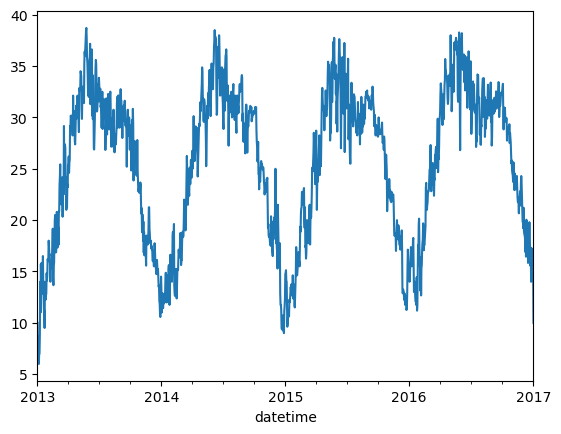

In [59]:
# create simpe plot of mean temp by date
ax = ts.plot()

### Figure Sizes for Time Series

In [66]:
# import plt
import matplotlib.pyplot as plt

# verify default plt dimensions for parameters
plt.rcParams['figure.figsize']

[6.4, 4.8]

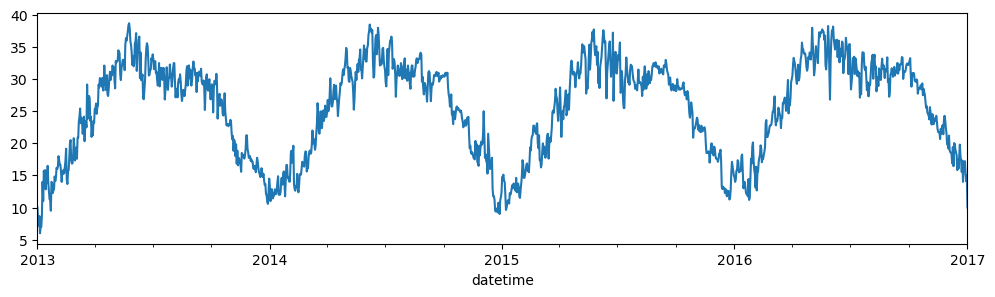

In [67]:
# plot same ts figure using 12x3 dimensions for parameters
ts.plot(figsize=(12,3));

In [68]:
# set figuresize parameters default to 12,3 as used above
plt.rcParams['figure.figsize'] = (12,3)

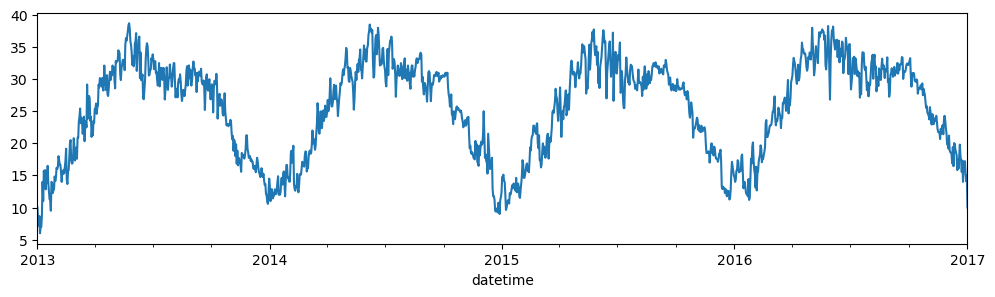

In [78]:
# verify changes
plt.rcParams['figure.figsize']

# verify plot is 12x3 by default without needing to specify parameters
ax = ts.plot();

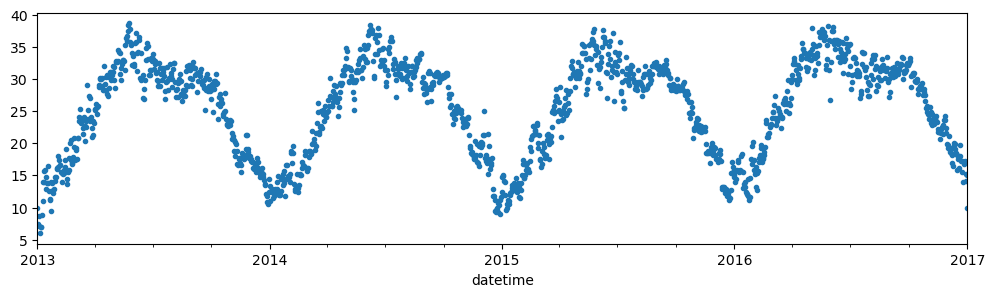

In [77]:
# create plot with markers instead of lines
ax = ts.plot(style='.');

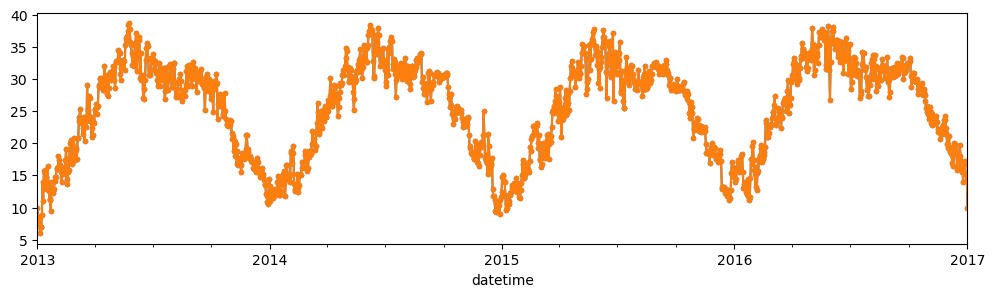

In [83]:
# create plot with markers AND lines using style parameter
ax = ts.plot(style='.-');

# or just using marker parameter

ax = ts.plot(marker='.')

### Formatting Date Xticks

In [85]:
# import mticks and mdates submodules which contain tick-formatting artists
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [105]:
# instantiate appropriate locator and formatter

# locator with optional monthly interval argument
locate_months = mdates.MonthLocator(interval=3)

# formatter with required format (fmt) argument
format_months = mdates.DateFormatter("%B-%y")

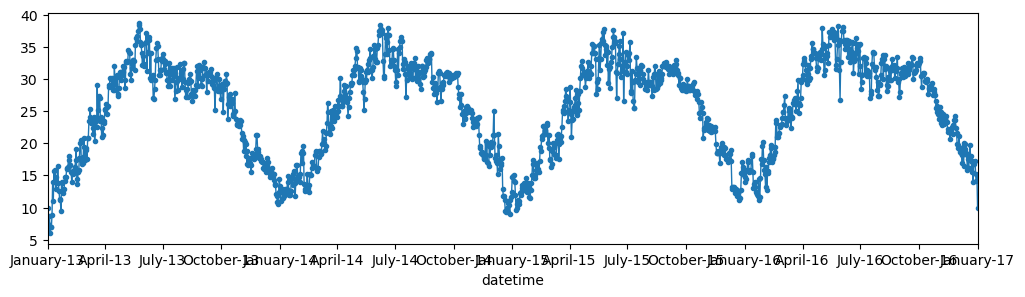

In [110]:
ax = ts.plot(marker = '.', lw=1);

# locator creates
ax.xaxis.set_major_locator(locate_months)

# formatter shows months in 3-month intervals as per locator but causes overlap
ax.xaxis.set_major_formatter(format_months)

### Fixing Overlapping Labels